# Lab 1: Report of Optimizing Revenue for Trojan Airlines

### Name: Chengjun Liu

## Executive Report

According to the business background, we constructed the simulated customer model and optimized over three pricing models.   
With 100 simulation of customer lists and take average performance of revenues, we conclude the maximum profits for three policies:

1. For constant pricing policy, the optimal price should be p=250, with predicted maximum profit of 2487.5

2. For dynamic pricing policy, the optimal price should be p1=235 and p2=315, with predicted maximum profit of 3293.3

2. For capacity rationing policy, the optimal price should be p1=235, p2=325, and seats l=35, with predicted maximum profit of 3775.75

## Generating Customers

In [2]:
from scipy.stats import uniform, norm
import pandas as pd

In [3]:
num_leisure = norm(loc=200, scale=60).rvs()
num_business = norm(loc=60, scale=20).rvs()

num_leisure = int(round((num_leisure if num_leisure >= 0 else 0), ndigits=0))
num_business = int(
    round((num_business if num_business >= 0 else 0), ndigits=0))

In [5]:
arrival_leisure = uniform(loc=0, scale=180).rvs(num_leisure)
arrival_business = uniform(loc=0, scale=14).rvs(num_business)

val_leisure = norm(loc=200, scale=80).rvs(num_leisure)
val_business = norm(loc=350, scale=120).rvs(num_business)

In [6]:
arrival_concat = list(arrival_leisure)+list(arrival_business)
val_concat = list(val_leisure)+list(val_business)

In [10]:
table = pd.DataFrame({"arrival_time": arrival_concat,
                      "valuation": val_concat}).sort_values('arrival_time',ascending=False)

table.head()

,arrival_time,valuation
43,178.570891,233.849023
44,178.531604,142.722531
18,178.315995,-4.142661
131,178.312841,83.560471
106,178.009540,263.590197


In [11]:
# this is the answer for the function.
def generateCustomers():
    num_leisure = norm(loc=200, scale=60).rvs()
    num_business = norm(loc=60, scale=20).rvs()

    num_leisure = int(
        round((num_leisure if num_leisure >= 0 else 0), ndigits=0))
    num_business = int(
        round((num_business if num_business >= 0 else 0), ndigits=0))
    arrival_leisure = uniform(loc=0, scale=180).rvs(num_leisure)
    arrival_business = uniform(loc=0, scale=14).rvs(num_business)

    val_leisure = norm(loc=200, scale=80).rvs(num_leisure)
    val_business = norm(loc=350, scale=120).rvs(num_business)
    arrival_concat = list(arrival_leisure)+list(arrival_business)
    val_concat = list(val_leisure)+list(val_business)

    table = pd.DataFrame({"arrival_time": arrival_concat, "valuation": val_concat}).sort_values(
        'arrival_time', ascending=False)
    return table

In [12]:
generateCustomers()

,arrival_time,valuation
192,179.724208,169.397984
222,179.503688,189.344036
187,179.481279,152.153355
128,179.459467,30.358386
158,179.208888,99.089500
...,...,...
98,0.568722,221.445158
242,0.520480,188.743208
31,0.342217,350.314528
24,0.124406,117.960478


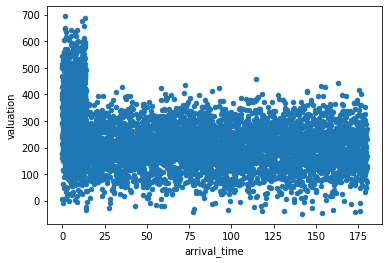

In [14]:
# for code check
import numpy as np
np.random.seed(0)
pd.concat([generateCustomers() for i in range(20)])\
    .plot(x='arrival_time', y='valuation', kind='scatter')

## Simulating Pricing Policies

In [15]:
def simulateConstant(customers, seats, p):
    occupy, revenue = 0, 0
    for i in range(len(customers)):
        if customers.iloc[i, 1] >= p:
            occupy += 1
            revenue += p
        if occupy == seats:
            break
    return revenue


def simulateDynamic(customers, seats, p1, p2):
    occupy, revenue = 0, 0
    for i in range(len(customers)):
        if customers.iloc[i, 0] > 14:
            if customers.iloc[i, 1] >= p1:
                occupy += 1
                revenue += p1
        else:
            if customers.iloc[i, 1] >= p2:
                occupy += 1
                revenue += p2
        if occupy == seats:
            break
    return revenue


def simulateRationing(customers, seats, p1, p2, l):
    occupy, revenue = 0, 0
    for i in range(len(customers)):
        if (seats-occupy) > l:
            if customers.iloc[i, 1] >= p1:
                occupy += 1
                revenue += p1
        else:
            if customers.iloc[i, 1] >= p2:
                occupy += 1
                revenue += p2
        if occupy == seats:
            break
    return revenue

In [16]:
data = [[170, 50], [150, 40], [13, 95], [12, 100]]
customers = pd.DataFrame(data, columns=['arrival_time', 'valuation'])
print('Constant policy with 2 seats p=50 \t:',
      simulateConstant(customers, 2, 50))
print('Constant policy with 2 seats p=100 \t:',
      simulateConstant(customers, 2, 100))
print('Dynamic policy with 3 seats p1=40, p2=95 \t:',
      simulateDynamic(customers, 3, 40, 95))
print('Dynamic policy with 2 seats p1=40, p2=95 \t:',
      simulateDynamic(customers, 2, 40, 95))
print('Dynamic policy with 1 seats p1=50, p2=100 \t:',
      simulateDynamic(customers, 1, 50, 100))
print('Rationing policy with 3 seats p1=40, p2=100, l=1 \t:',
      simulateRationing(customers, 3, 40, 100, 1))
print('Rationing policy with 2 seats p1=40, p2=100, l=1 \t:',
      simulateRationing(customers, 2, 40, 100, 1))
print('Rationing policy with 1 seats p1=40, p2=95, l=1 \t:',
      simulateRationing(customers, 1, 40, 95, 1))

Constant policy with 2 seats p=50 	: 100
Constant policy with 2 seats p=100 	: 100
Dynamic policy with 3 seats p1=40, p2=95 	: 175
Dynamic policy with 2 seats p1=40, p2=95 	: 80
Dynamic policy with 1 seats p1=50, p2=100 	: 50
Rationing policy with 3 seats p1=40, p2=100, l=1 	: 180
Rationing policy with 2 seats p1=40, p2=100, l=1 	: 140
Rationing policy with 1 seats p1=40, p2=95, l=1 	: 95


## Optimizing Parameters

In [17]:
# simulate 100 curves to see a general maximum distribution

Customer_List=[]

for i in range(100):
    Customer_List.append(generateCustomers())

def find_revenue_constant(customer_list,p_list):
    max_list=[]
    for i in range(len(customer_list)):
        max_for_p=[]
        for p in p_list:
            max_for_p.append(simulateConstant(customer_list[i],100,p))
        max_list.append(max_for_p)
    
    return max_list

p_list=range(50,401,20)
matrice=find_revenue_constant(Customer_List,p_list)


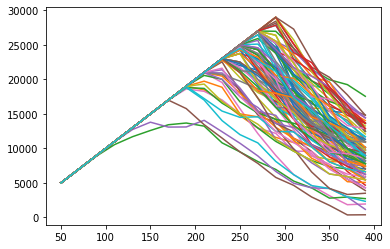

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(p_list,np.array(matrice).T)
plt.show()

In [19]:
# test for defining maximum function for constant instance

def find_revenue_constant(customer_list,p_list):
    max_list=[]
    for p in p_list:
        max_for_p=[]
        for i in range(len(customer_list)):
            max_for_p.append(simulateConstant(customer_list[i],100,p))
        max_list.append(np.mean(max_for_p))
    
    return max_list

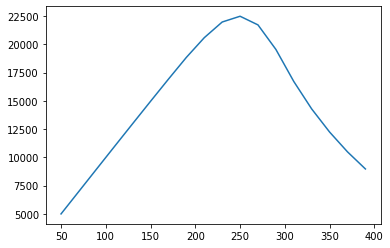

In [20]:
matrice=find_revenue_constant(Customer_List,p_list)
plt.plot(p_list,matrice)

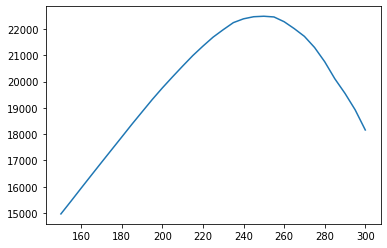

In [21]:
p_list=range(150,301,5)
matrice=find_revenue_constant(Customer_List,p_list)
plt.plot(p_list,matrice)

In [22]:
# formal definitions of three instances

def find_revenue_constant(customer_list,p_list):
    max_list=[]
    for p in p_list:
        max_for_p=[]
        for i in range(len(customer_list)):
            max_for_p.append(simulateConstant(customer_list[i],100,p))
        max_list.append(np.mean(max_for_p))
        
    return dict(zip(p_list,max_list))


def find_revenue_dynamic(customer_list,p1_list,p2_list):
    max_list=[]
    p_list=[]
    for p1 in p1_list:
        for p2 in p2_list:
            max_for_p=[]
            for i in range(len(customer_list)):
                max_for_p.append(simulateDynamic(customer_list[i],100,p1,p2))
            max_list.append(np.mean(max_for_p))
            p_list.append((p1,p2))
    return dict(zip(p_list,max_list))

def find_revenue_rationing(customer_list,p1_list,p2_list,l_list):
    max_list=[]
    p_list=[]
    for p1 in p1_list:
        for p2 in p2_list:
            for l in l_list:
                max_for_p=[]
                for i in range(len(customer_list)):
                    max_for_p.append(simulateRationing(customer_list[i],100,p1,p2,l))
                max_list.append(np.mean(max_for_p))
                p_list.append((p1,p2,l))
                
    return dict(zip(p_list,max_list))

In [24]:
p_list=range(100,401,20)
condict_20=find_revenue_constant(Customer_List,p_list)

con_revenue_20=0
for i,j in condict_20.items():
    if j>con_revenue_20:
        keys_constant_20=i
        con_revenue_20=j
        
print(keys_constant_20,con_revenue_20)

240 22389.6


In [25]:
p_list=range(220,261,5)
condict_5=find_revenue_constant(Customer_List,p_list)

con_revenue_5=0
for i,j in condict_5.items():
    if j>con_revenue_5:
        keys_constant_5=i
        con_revenue_5=j
        
print(keys_constant_5,con_revenue_5)

250 22487.5


In [26]:
p1_list=range(200,401,20)
p2_list=range(200,401,20)
dydict_20=find_revenue_dynamic(Customer_List,p1_list,p2_list)

dy_revenue_20=0
for i,j in dydict_20.items():
    if j>dy_revenue_20:
        keys_dy_20=i
        dy_revenue_20=j
        
print(keys_dy_20,dy_revenue_20)

(240, 320) 23268.0


In [27]:
p1_list=range(220,261,5)
p2_list=range(300,341,5)
dydict_5=find_revenue_dynamic(Customer_List,p1_list,p2_list)

dy_revenue_5=0
for i,j in dydict_5.items():
    if j>dy_revenue_5:
        keys_dy_5=i
        dy_revenue_5=j
        
print(keys_dy_5,dy_revenue_5)

(235, 315) 23293.3


In [28]:
p1_list=range(200,301,20)
p2_list=range(240,401,20)
l_list=range(0,101,20)
radict_ration_20=find_revenue_rationing(Customer_List,p1_list,p2_list,l_list)

max_ration_20=0
keys_ration_20=0
for i,j in radict_ration_20.items():
    if j>max_ration_20:
        keys_ration_20=i
        max_ration_20=j
        
print(keys_ration_20,max_ration_20)

(220, 320, 40) 23662.2


In [32]:
p1_list=range(200,241,5)
p2_list=range(300,341,5)
l_list=range(20,61,5)
dict_ration_5=find_revenue_rationing(Customer_List,p1_list,p2_list,l_list)

max_ration_5=0
keys_ration_5=0
for i,j in dict_ration_5.items():
    if j>max_ration_5:
        keys_ration_5=i
        max_ration_5=j
        
print(keys_ration_5,max_ration_5)

(235, 325, 35) 23775.75


In [33]:
# conclusion

print("Constant price policy: best p =",keys_constant_5,", estimated expected profit = ",con_revenue_5-20000)
print("Dynamic price policy: best p1 =",keys_dy_5[0],", best p2 =",keys_dy_5[1],", estimated expected profit = ",dy_revenue_5-20000)
print("Capacity rationing policy: best p1 =",keys_ration_5[0],", best p2 =",keys_ration_5[1],", best l =",keys_ration_5[2],", estimated expected profit = ",max_ration_5-20000)

Constant price policy: best p = 250 , estimated expected profit =  2487.5
Dynamic price policy: best p1 = 235 , best p2 = 315 , estimated expected profit =  3293.2999999999993
Capacity rationing policy: best p1 = 235 , best p2 = 325 , best l = 35 , estimated expected profit =  3775.75
